In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
sns.set_context('poster', font_scale=1.25)

In [4]:
sns.set_style('white')

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
from LB_D2Q9.dimensionless import opencl_dim as lb_cl
from LB_D2Q9.dimensionless import cython_dim as lb_cython
from LB_D2Q9.dimensionless import python_dim as lb_python

# This document is a work in progress...haven't gotten periodic BC's working yet

We now want to visualize the evolution of the flow...let's see how it goes...

In [7]:
from IPython import display

It's probably easier to specify dt and dr and the dimensions. Then get everything else from that...yeah. That way the velocity is on the scale of U ~ 0.1 or so.

In [12]:
inlet_velocity = .2

D = 1. # meter
rho = 1. # kg/m^3
nu = 1. # Viscosity, m^2/s

pressure_grad = -10 # Pa/m

pipe_length = 3*D # meter

# initialize cylinder
cylinder_center = [pipe_length/4, D/2]
cylinder_radius = D/10

# sim_cl = lb_cl.Pipe_Flow_Cylinder(diameter=D, rho=rho, viscosity=nu, pressure_grad=pressure_grad, pipe_length=pipe_length,
#                              N=25, time_prefactor=1.,
#                              cylinder_center=cylinder_center, cylinder_radius=cylinder_radius,
#                              two_d_local_size = (32, 32), three_d_local_size = (32, 32, 1))

In [13]:
sim_cython = lb_cython.Velocity_Inlet_Cylinder(diameter=D, rho=rho, viscosity=nu, pipe_length=pipe_length,
                                          cylinder_center=cylinder_center, cylinder_radius=cylinder_radius,
                                          inlet_velocity=inlet_velocity,
                                          N=25, time_prefactor=1.)

Characteristic L: 0.1
Characteristic T: 0.5
Reynolds number: 0.04
omega 0.0132450331126


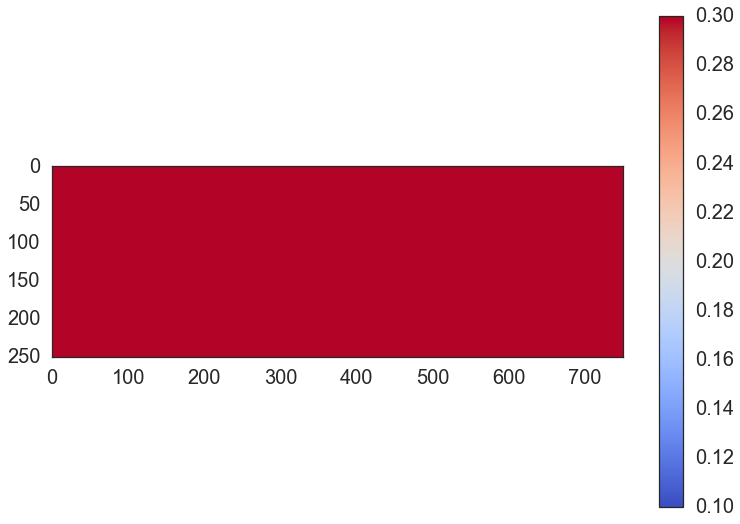

In [18]:
sim_cython.run(50)
plt.imshow(sim_cython.rho.T, cmap=cm.coolwarm)
plt.clim(0.1, 0.3)
plt.colorbar()

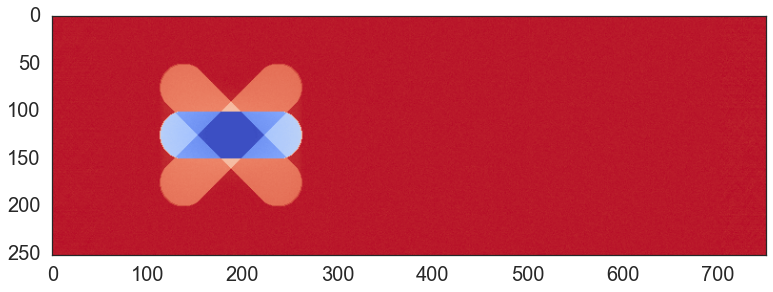

In [15]:
plt.imshow(sim_cython.u.T, cmap=cm.coolwarm)

Yeah, IDK what is going on here. lol.